# Exercise 4:  Linear Regression

---

## House Prices - Advanced Regression Techniques

#### Price Versus Lot Area

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
houseData = pd.read_csv('train.csv')

Extract the following Numeric variables from the dataset, and store as two new Pandas DataFrames

In [3]:
houseLotArea = pd.DataFrame(houseData['LotArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

Plot houseSalePrice against houseLotArea using standard jointplot, and note the strong linear relationship.

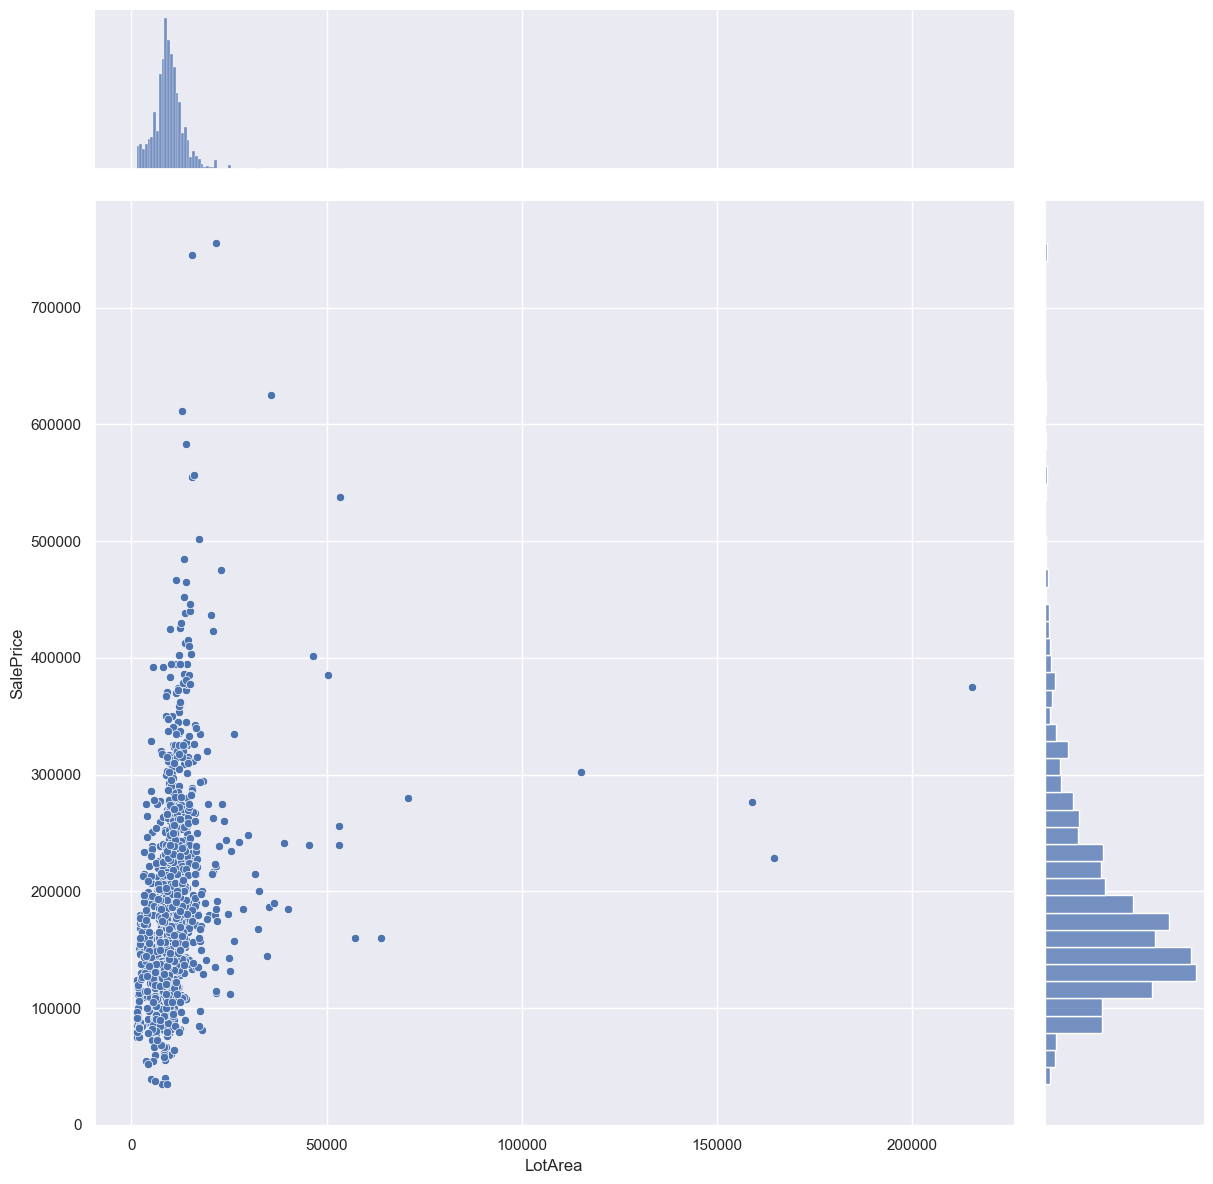

In [4]:
PriceVLot = pd.concat([houseLotArea, houseSalePrice], axis = 1).reindex(houseLotArea.index)

sb.jointplot(data = PriceVLot, x = "LotArea", y = "SalePrice", height = 12)

<Axes: >

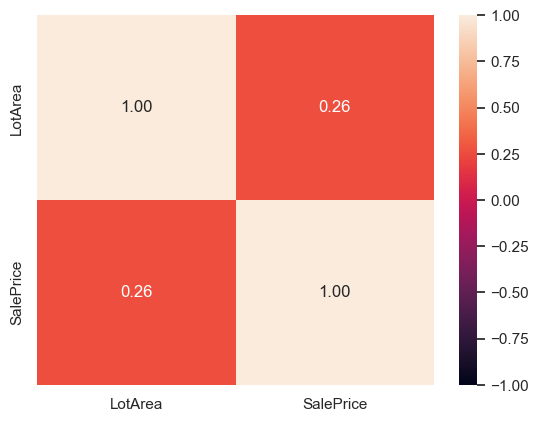

In [5]:
sb.heatmap(PriceVLot.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Import Linear Regression model from Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression

Partition both datasets houseLotArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.

In [7]:
houseLotArea_train = pd.DataFrame(houseLotArea[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

houseLotArea_test = pd.DataFrame(houseLotArea[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

print("Train Set :", houseLotArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseLotArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


Training : Fit a Linear Regression model with X = houseLotArea_train and y = houseSalePrice_train

In [8]:
linreg = LinearRegression()
linreg.fit(houseLotArea_train, houseSalePrice_train)

LinearRegression()

Print the coefficients of the Linear Regression model you just fit.

In [9]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


Plot the Regression line on a Scatterplot of houseLotArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.

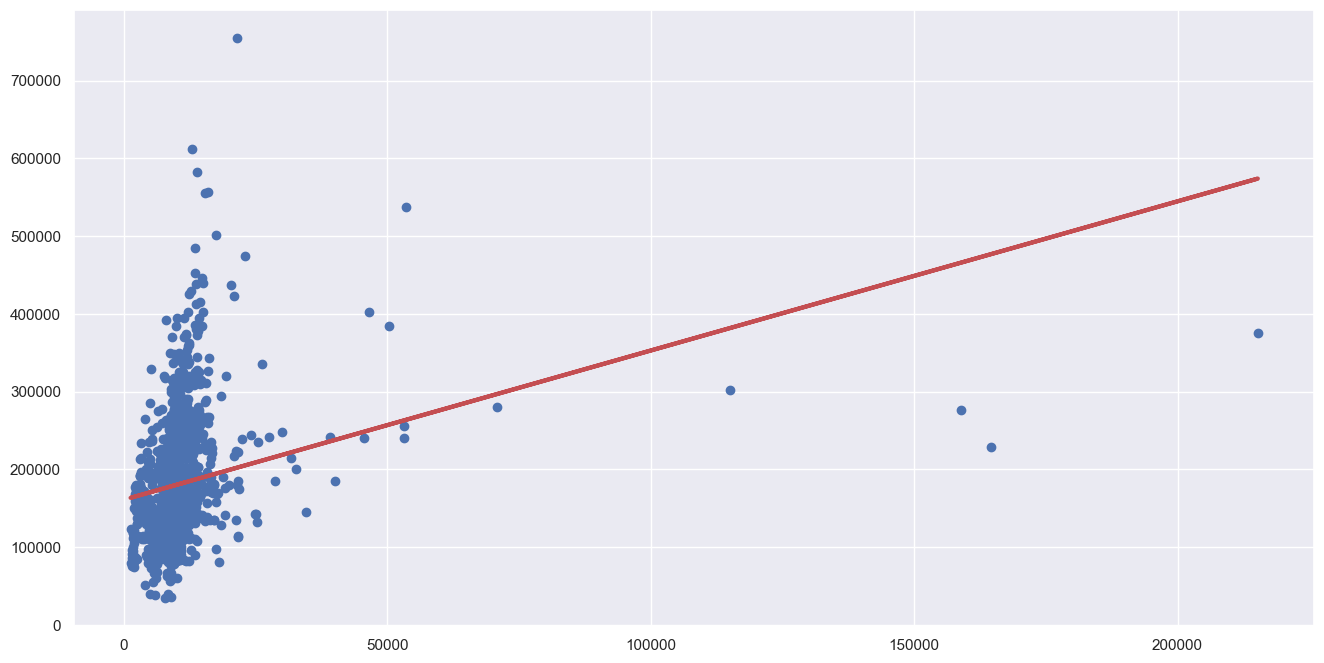

In [10]:
regline_x = houseLotArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseLotArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

Predict SalePrice for the test dataset houseLotArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseLotArea_test and houseSalePrice_test to visualize the accuracy.

In [11]:
houseLotArea_train_pred = linreg.predict(houseLotArea_train)
houseLotArea_test_pred = linreg.predict(houseLotArea_test)

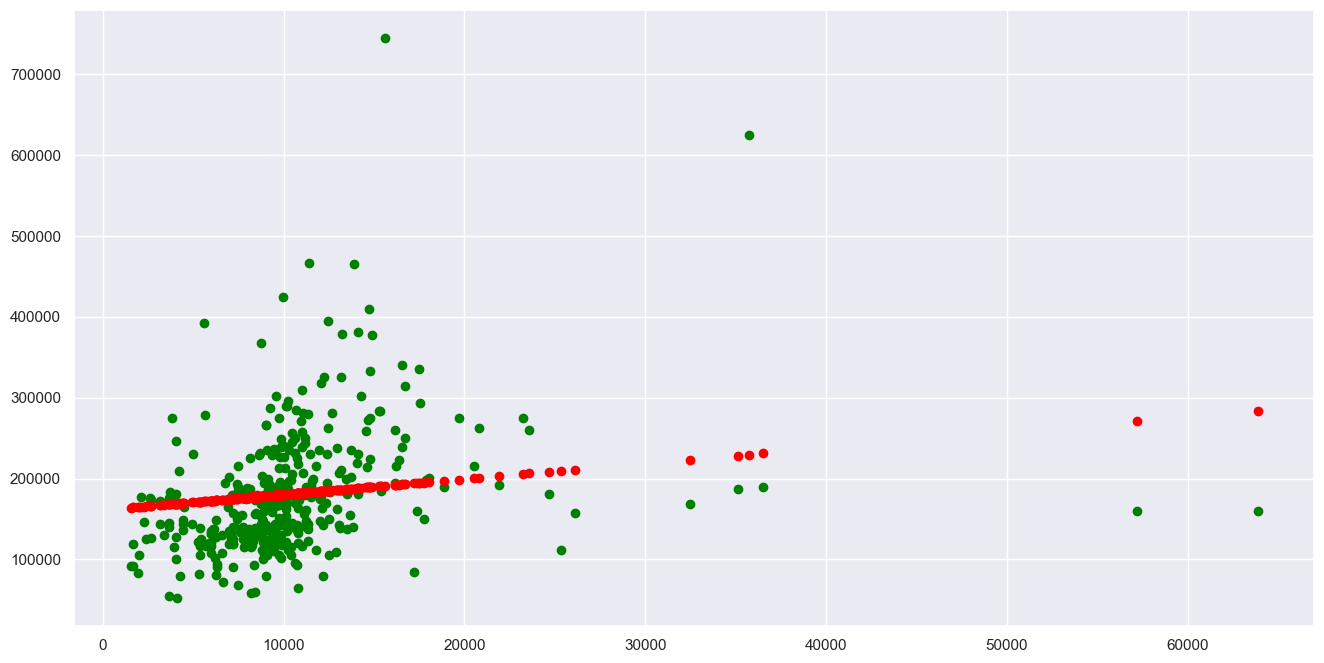

In [12]:
f = plt.figure(figsize=(16, 8))
plt.scatter(houseLotArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseLotArea_test, houseLotArea_test_pred, color = "red")
plt.show()

Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

In [13]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [14]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_train, houseSalePrice_train))
mse = mean_sq_err(houseSalePrice_train, houseLotArea_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("\n\n\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_test, houseSalePrice_test))
mse = mean_sq_err(houseSalePrice_test, houseLotArea_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06996047063721678
Mean Squared Error (MSE) 	: 5885258821.936573
Root Mean Squared Error (RMSE) 	: 76715.44057056945



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06617868448896169
Mean Squared Error (MSE) 	: 5827711275.733228
Root Mean Squared Error (RMSE) 	: 76339.44770387869
